<a href="https://colab.research.google.com/github/Cardomper/TFM/blob/main/TFM_Carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DIRECTORIO = "/content/drive/MyDrive/CarlosD"
# DIRECTORIO = "/content/drive/MyDrive/UOC2021-2022-2/Carlos_Dominguez"

In [ ]:
cd {DIRECTORIO}

/content/drive/MyDrive/CarlosD


In [ ]:
ls

 condacolab_install.log       runs/               'TFM Carlos.ipynb'
 dataset@                     sequences_kmer.tsv   train.tsv
 dev.tsv                      sequences_kmer.txt   user_predictions.csv
 DNABERT/                     test@                X2_data.csv
 Documentos_plantillas_UOC@   text_data.csv        Y_data.csv
 flagged/                     text_data_norm.csv


In [ ]:
import os

In [ ]:
folder = os.path.join(DIRECTORIO,"dataset")
# print(folder)

fname_data1 = os.path.join(folder,'scerevisiae.rsd1.lmbda_22.npz')

print(fname_data1)

/content/drive/MyDrive/CarlosD/dataset/scerevisiae.rsd1.lmbda_22.npz


In [ ]:
import numpy as np

def load_data(fname):
    # X is multi-variable array
    # Y contains single variable - fix shape for Keras

    npzfile = np.load(fname)
    Xh_train = npzfile['arr_0']
    Xh_test = npzfile['arr_1']
    Xv_train = npzfile['arr_2']
    Xv_test = npzfile['arr_3']
    Y_train = npzfile['arr_4']
    Y_test = npzfile['arr_5']

    X_train = list()
    X_train.append(Xh_train)
    X_train.append(Xv_train)
    X_test = list()
    X_test.append(Xh_test)
    X_test.append(Xv_test)

    Y_train = Y_train.astype(np.float32).reshape((-1,1))
    Y_test = Y_test.astype(np.float32).reshape((-1,1))

    return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = load_data(fname_data1) 
print(len(X_test))
print(len(Y_test))

2
425


In [ ]:
X_train[-1].shape

(3813, 72)

In [ ]:
X_train[0].shape

(3813, 2150, 4)

In [ ]:
X_test[0].shape

(425, 2150, 4)

In [ ]:
X_train[1].shape

(3813, 72)

In [ ]:
input_shapes = [sl.shape[1:] for sl in X_train]

In [ ]:
input_shapes

[(2150, 4), (72,)]

In [ ]:
Y_train.shape

(3813, 1)

In [ ]:
X_train[0][0,:,:]

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]], dtype=int8)

In [ ]:
X_train[1][:,9:].max()

223

In [ ]:
X_train_desp = X_train[0].reshape((3813,2150*4))

In [ ]:
X2_train = X_train[1]
X2_test = X_test[1]
print(X2_train.shape)
print(X2_test.shape)

(3813, 72)
(425, 72)


In [ ]:
#Unimos X e Y
X2_data=np.concatenate([X2_train,X2_test], axis=0)
Y_data=np.concatenate([Y_train,Y_test], axis=0)

In [ ]:
np.savetxt("X2_data.csv",X2_data,fmt='%s',delimiter=",", comments="")
np.savetxt("Y_data.csv",Y_data,fmt='%s',delimiter=",", comments="")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


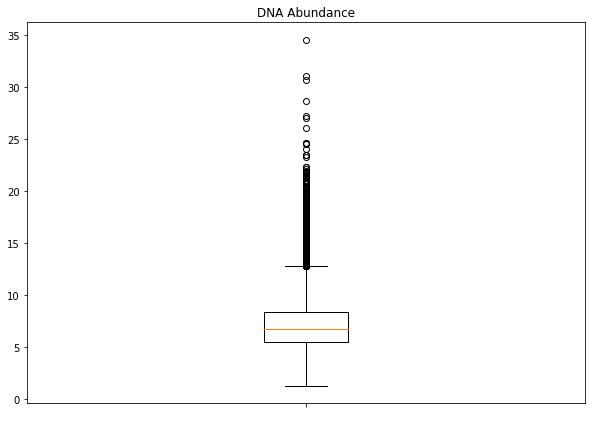

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
plt.boxplot(Y_data)
ax = fig.add_subplot(111)
ax.set_xticklabels(" ")
 
# Adding title
plt.title("DNA Abundance")
 
plt.show()

#Random forest (datos no secuenciales)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X2_train, Y_train.ravel())

RandomForestRegressor()

In [ ]:
model.score(X2_test,Y_test.ravel())

0.7656984068364819

# Convertir a secuencia de texto

Hay un problema hay partes que son todas cero [0, 0, 0, 0]. El paper menciona que son las regiones UTR. Sin embargo, esto no debería ser un problema, dado que cuando se trabaja con textos, los textos no son de igual longitud. Se me ocurre por ahora, extraer sólo la secuencia que no son cero [Otra posibilidad es colocar una letra diferente]

In [ ]:
letras = np.array(['A', 'C', 'G', 'T'])

In [ ]:
def conv_to_text(dataset):
  seq_list=[]
  for i in range(dataset[0].shape[0]):
    secuencia=""
    seq_list.append(secuencia.join(letras[np.where(dataset[0][i])[1]]))
  seq_list=np.array(seq_list)
  return seq_list

In [ ]:
X_train_text=conv_to_text(X_train)
X_train_text.shape

(3813,)

In [ ]:
X_test_text=conv_to_text(X_test)
X_test_text.shape

(425,)

In [ ]:
X_train_text=X_train_text[:, np.newaxis] #Añadimos una dimensión para poder unir X e Y
X_test_text=X_test_text[:, np.newaxis]
train=np.concatenate([X_train_text, Y_train], axis=1)
test=np.concatenate([X_test_text, Y_test], axis=1)
text_data=np.concatenate([train,test], axis=0)

In [ ]:
np.savetxt("text_data.csv",text_data,fmt='%s',delimiter=",", header="sequence,target", comments="")

In [ ]:
import pandas as pd
text_data = pd.read_csv('text_data.csv')
print(len(text_data))

4238


# Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
text_data[["target"]]=scale.fit_transform(text_data[["target"]])
text_data.to_csv('text_data_norm.csv')
text_data.head()

,sequence,target
0,TGCGGAATCTTAATTGTGCGGATCCTTTTACCTTTTCTCATATTAA...,0.386194
1,AGCGCCAAACGAAATATTGCTTTTGTAGAAGGGTTGAAGAAGGTAC...,-0.711836
2,ATACCAATTACTGTCCGTAGTTCGTCAGATTAGAATCCACTATATT...,-0.148928
3,AGGGTTACAAGTACAAGATGAGATACGTCTACGCGCATTTCCCAAT...,0.742004
4,ACAAATCAGCTCCGATCTTCTCATATGAAAATCAGCAGCCGTGACA...,1.092220


# Pytorch

In [ ]:
#!pip3 uninstall numpy
#pip install -U numpy

Found existing installation: numpy 1.21.5
Uninstalling numpy-1.21.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.5


In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchtext
import time
import random
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data.dataset import random_split

torch.backends.cudnn.deterministic = True

## Datos

In [ ]:
def split(word):
    return list(word)

Aquí vemos que las secuencias tienen longitudes distintas:

In [ ]:
text_data = pd.read_csv('text_data_norm.csv')

print(len(split(text_data["sequence"].iloc[0])))
print(len(split(text_data["sequence"].iloc[4])))

1566
1765


### Read data

In [ ]:
class TextData(Dataset):
    '''
    Dataset basico para leer las secuencias
    '''
    def __init__(self, filename):
        super(TextData, self).__init__()
        df = pd.read_csv(filename)
        self.df = df[["sequence", "target"]]
        
    def __getitem__(self, index):
        return self.df.iloc[index,0], self.df.iloc[index,1]
    
    def __len__(self):
        return len(self.df)

In [ ]:
ds = TextData("text_data_norm.csv")

In [ ]:
tr_per = 0.85
train_dataset, valid_dataset = random_split(ds,
 [int(len(ds)*tr_per),len(ds) - int(len(ds)*tr_per)], torch.manual_seed(42))

In [ ]:
text_data.target.min()

-1.934744067668322

### Tokenización

In [ ]:
## Paso 2: Encuentre tokens únicos (palabras)
import re
from collections import Counter, OrderedDict
from textwrap import wrap

token_counts = Counter()

def tokenizer(text):
    tokenized = wrap(text,6)
    tokenized = ["<beg>"] + tokenized + ["<end>"] #Añadimos un token de inicio y otro de fin de la secuencia
    return tokenized


for line, label in train_dataset:
    tokens = tokenizer(line)
    token_counts.update(tokens)
 
    
print('Vocab-size:', len(token_counts))

Vocab-size: 4803




### Numericalización






In [ ]:
## Paso 3: Codificación de cada token único en enteros

from torchtext.vocab import vocab

sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
ordered_dict = OrderedDict(sorted_by_freq_tuples)

vocab = vocab(ordered_dict)

vocab.insert_token("<pad>", 0)
vocab.insert_token("<unk>", 1)
vocab.set_default_index(1)

print([vocab[token] for token in ["A","C","T","G","AA","AC","TG"]])

[2422, 3101, 1905, 3166, 3852, 4111, 4097]


In [ ]:
## Paso 3-A: Defina las funciones para la transformación.

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]



## Paso 3-B: función de codificación y transformación
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _text, _label in batch:
        label_list.append(_label) #¿Hay que usar label list?
        processed_text = torch.tensor(text_pipeline(_text), 
                                      dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True)
    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

In [ ]:
## Toma un pequeño batch

from torch.utils.data import DataLoader
dataloader = DataLoader(train_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch)
text_batch, label_batch, length_batch = next(iter(dataloader))
print(text_batch)
print(label_batch)
print(length_batch)
print(text_batch.shape)

tensor([[   4, 2328,   39,  ...,    0,    0,    0],
        [   4, 1714,  937,  ...,    0,    0,    0],
        [   4, 1405, 1870,  ...,  306, 3041,    5],
        [   4,  895,  614,  ...,    0,    0,    0]], device='cuda:0')
tensor([-0.7410,  0.0267, -1.0391, -0.3489], device='cuda:0',
       dtype=torch.float64)
tensor([277, 264, 282, 278], device='cuda:0')
torch.Size([4, 282])


In [ ]:
## Paso 4: batching los datasets

batch_size = 64

train_dl = DataLoader(train_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(valid_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)

## Modelo LSTM

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,num_layers=2,
                           batch_first=True,bidirectional = True, dropout=0.4 )
        self.fc1 = nn.Linear(rnn_hidden_size*2, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        # out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 64
fc_hidden_size = 32

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

#### Entrenamiento

##### MSE

In [ ]:
train_losses=[]
val_losses=[]

def train(dataloader):
    model.train()
    total_loss = 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred.float(), label_batch.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*label_batch.size(0)
        
    train_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred.float(), label_batch.float())
            total_loss += loss.item()*label_batch.size(0)
            
    val_losses.append(total_loss/len(dataloader.dataset))       
    return total_loss/len(dataloader.dataset)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 1.0177 loss valid: 0.9317
Epoch 1 loss train: 1.0130 loss valid: 0.9298
Epoch 2 loss train: 1.0122 loss valid: 0.9292
Epoch 3 loss train: 1.0114 loss valid: 0.9291
Epoch 4 loss train: 1.0110 loss valid: 0.9294
Epoch 5 loss train: 1.0102 loss valid: 0.9296
Epoch 6 loss train: 1.0097 loss valid: 0.9296
Epoch 7 loss train: 1.0077 loss valid: 0.9302
Epoch 8 loss train: 1.0058 loss valid: 0.9308
Epoch 9 loss train: 1.0025 loss valid: 0.9321
Epoch 10 loss train: 0.9970 loss valid: 0.9341
Epoch 11 loss train: 0.9889 loss valid: 0.9375
Epoch 12 loss train: 0.9752 loss valid: 0.9466
Epoch 13 loss train: 0.9526 loss valid: 0.9672
Epoch 14 loss train: 0.9373 loss valid: 0.9831
Epoch 15 loss train: 0.9058 loss valid: 1.0057
Epoch 16 loss train: 0.8850 loss valid: 1.0785
Epoch 17 loss train: 0.8768 loss valid: 1.0551
Epoch 18 loss train: 0.8367 loss valid: 1.0770
Epoch 19 loss train: 0.8108 loss valid: 1.1169
Epoch 20 loss train: 0.7762 loss valid: 1.1106
Epoch 21 loss train: 0.

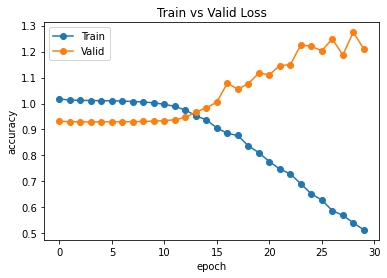

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')

plt.show()

##### RMSE

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 64
fc_hidden_size = 32

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

In [ ]:
train_losses=[]
val_losses=[]
eps=1e-6
def train(dataloader):
    model.train()
    total_loss = 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = torch.sqrt(loss_fn(pred.float(), label_batch.float()) +eps)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*label_batch.size(0)
        
    train_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = torch.sqrt(loss_fn(pred.float(), label_batch.float()) +eps)
            total_loss += loss.item()*label_batch.size(0)
            
    val_losses.append(total_loss/len(dataloader.dataset))       
    return total_loss/len(dataloader.dataset)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 1.1624 loss valid: 0.9613
Epoch 1 loss train: 0.9421 loss valid: 1.0128
Epoch 2 loss train: 0.8210 loss valid: 1.0590
Epoch 3 loss train: 0.6612 loss valid: 1.1264
Epoch 4 loss train: 0.5305 loss valid: 1.0848
Epoch 5 loss train: 0.4535 loss valid: 1.0949
Epoch 6 loss train: 0.4055 loss valid: 1.1007
Epoch 7 loss train: 0.3590 loss valid: 1.1295
Epoch 8 loss train: 0.3164 loss valid: 1.1285
Epoch 9 loss train: 0.2992 loss valid: 1.1212
Epoch 10 loss train: 0.2816 loss valid: 1.0818
Epoch 11 loss train: 0.2678 loss valid: 1.1110
Epoch 12 loss train: 0.2436 loss valid: 1.0945
Epoch 13 loss train: 0.2353 loss valid: 1.1049
Epoch 14 loss train: 0.2268 loss valid: 1.1026
Epoch 15 loss train: 0.2157 loss valid: 1.0707
Epoch 16 loss train: 0.2030 loss valid: 1.0873
Epoch 17 loss train: 0.2023 loss valid: 1.0888
Epoch 18 loss train: 0.1877 loss valid: 1.0705
Epoch 19 loss train: 0.1811 loss valid: 1.0940
Epoch 20 loss train: 0.1819 loss valid: 1.0837
Epoch 21 loss train: 0.

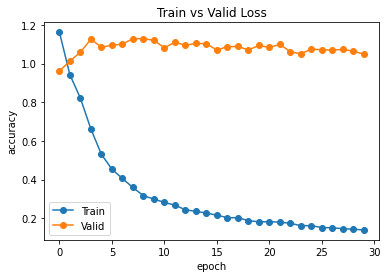

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')

plt.show()

##### R2

In [ ]:
y=[]
y_pred=[]
with torch.no_grad():
    model.eval()
    for text_batch, label_batch, lengths in dataloader:

        outputs = model(text_batch, lengths)[:, 0]
        y.append(label_batch.cpu().numpy())
        y_pred.append(outputs.cpu().numpy())

In [ ]:
y_pred = [a.squeeze().tolist() for a in y_pred]
y = [a.squeeze().tolist() for a in y]
y=sum(y,[])
y_pred=sum(y_pred,[])

In [ ]:
from sklearn.metrics import r2_score
r_square = r2_score(y, y_pred)
print(r_square)

0.9874635314373907


## Modelo GRU

In [ ]:
class GRU(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.GRU(embed_dim, rnn_hidden_size,num_layers=2,
                           batch_first=True,bidirectional = True, dropout=0.3 )
        self.fc1 = nn.Linear(rnn_hidden_size*2, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden) = self.rnn(out)
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        # out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 64
fc_hidden_size = 32

torch.manual_seed(1)
model = GRU(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

### Entrenamiento

#### MSE

In [ ]:
train_losses=[]
val_losses=[]
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')


Epoch 0 loss train: 0.9984 loss valid: 0.9454
Epoch 1 loss train: 0.9793 loss valid: 0.9562
Epoch 2 loss train: 0.8941 loss valid: 1.1054
Epoch 3 loss train: 0.7672 loss valid: 1.0104
Epoch 4 loss train: 0.6166 loss valid: 1.0284
Epoch 5 loss train: 0.5157 loss valid: 1.0730
Epoch 6 loss train: 0.4988 loss valid: 1.0513
Epoch 7 loss train: 0.4447 loss valid: 1.0748
Epoch 8 loss train: 0.4053 loss valid: 1.1054
Epoch 9 loss train: 0.3875 loss valid: 1.0762
Epoch 10 loss train: 0.3758 loss valid: 1.1410
Epoch 11 loss train: 0.3758 loss valid: 1.0742
Epoch 12 loss train: 0.3514 loss valid: 1.1179
Epoch 13 loss train: 0.3457 loss valid: 1.0688
Epoch 14 loss train: 0.3344 loss valid: 1.1248
Epoch 15 loss train: 0.3463 loss valid: 1.1097
Epoch 16 loss train: 0.3498 loss valid: 1.1266
Epoch 17 loss train: 0.3722 loss valid: 1.2009
Epoch 18 loss train: 0.3644 loss valid: 1.1191
Epoch 19 loss train: 0.3992 loss valid: 1.1739
Epoch 20 loss train: 0.5324 loss valid: 1.1500
Epoch 21 loss train: 0.

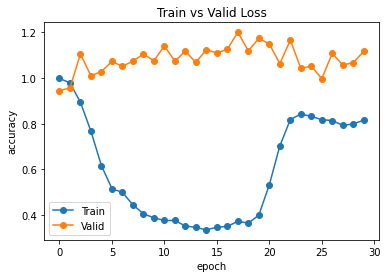

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')

plt.show()

#### RMSE

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 64
fc_hidden_size = 32

torch.manual_seed(1)
model = GRU(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

In [ ]:
train_losses=[]
val_losses=[]
eps=1e-6
def train(dataloader):
    model.train()
    total_loss = 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = torch.sqrt(loss_fn(pred.float(), label_batch.float()) +eps)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*label_batch.size(0)
        
    train_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = torch.sqrt(loss_fn(pred.float(), label_batch.float()) +eps)
            total_loss += loss.item()*label_batch.size(0)
            
    val_losses.append(total_loss/len(dataloader.dataset))       
    return total_loss/len(dataloader.dataset)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 0.8041 loss valid: 1.0873
Epoch 1 loss train: 0.7937 loss valid: 1.0957
Epoch 2 loss train: 0.7928 loss valid: 1.0822
Epoch 3 loss train: 0.7891 loss valid: 1.0684
Epoch 4 loss train: 0.7749 loss valid: 1.0759
Epoch 5 loss train: 0.7872 loss valid: 1.0870
Epoch 6 loss train: 0.7814 loss valid: 1.0997
Epoch 7 loss train: 0.7903 loss valid: 1.0730
Epoch 8 loss train: 0.7862 loss valid: 1.0664
Epoch 9 loss train: 0.7877 loss valid: 1.0766
Epoch 10 loss train: 0.7761 loss valid: 1.0787
Epoch 11 loss train: 0.7720 loss valid: 1.0660
Epoch 12 loss train: 0.7888 loss valid: 1.0629
Epoch 13 loss train: 0.7906 loss valid: 1.0710
Epoch 14 loss train: 0.7787 loss valid: 1.0572
Epoch 15 loss train: 0.7832 loss valid: 1.0534
Epoch 16 loss train: 0.7735 loss valid: 1.0777
Epoch 17 loss train: 0.7820 loss valid: 1.0736
Epoch 18 loss train: 0.7840 loss valid: 1.0695
Epoch 19 loss train: 0.7905 loss valid: 1.0751
Epoch 20 loss train: 0.7836 loss valid: 1.0631
Epoch 21 loss train: 0.

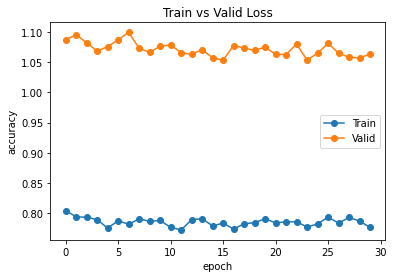

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')

plt.show()

#### R2

In [ ]:
y=[]
y_pred=[]
with torch.no_grad():
    model.eval()
    for text_batch, label_batch, lengths in dataloader:

        outputs = model(text_batch, lengths)[:, 0]
        y.append(label_batch.cpu().numpy())
        y_pred.append(outputs.cpu().numpy())

In [ ]:
y_pred = [a.squeeze().tolist() for a in y_pred]
y = [a.squeeze().tolist() for a in y]
y=sum(y,[])
y_pred=sum(y_pred,[])

In [ ]:
from sklearn.metrics import r2_score
r_square = r2_score(y, y_pred)
print(r_square)

0.442686390950082


## Transformers

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


In [ ]:
! conda install pytorch torchvision cudatoolkit=10.0 -c pytorch
! git clone https://github.com/jerryji1993/DNABERT
! cd DNABERT
! cd examples
!python3 -m pip install -r /content/drive/MyDrive/CarlosD/DNABERT/examples/requirements.txt


Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / WARNING conda.core.solve:_add_specs(649): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
- \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.

Cloning into 'DNABERT'...
remote: Enumerating objects: 766, done.
remote: Total 766 (delta 0), reused 0 (delta 0), pack-reused 766
Receiving objects: 100% (766/766), 11.60 MiB | 9.83 MiB/s, done.
Resolving deltas: 100% (403/403), done.
Checking out files: 100% (252/252), done.
/bin/bash: line 0: cd: examples: No such file or directory


### Data processing

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
text_data = pd.read_csv('text_data_norm.csv')

In [ ]:
def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space
    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [ ]:
sequences_kmer=[]
targets_kmer=[]
for line in text_data.sequence:
    sequences_kmer.append(seq2kmer(line,6))

for line in text_data.target:
    targets_kmer.append(line)


data_kmer=np.column_stack([sequences_kmer, targets_kmer])


In [ ]:
np.savetxt("sequences_kmer.tsv",text_data,fmt='%s',delimiter=",", comments="")

In [ ]:
cd {"/content/drive/MyDrive/CarlosD/DNABERT"}

/content/drive/MyDrive/CarlosD/DNABERT


In [ ]:
!!unzip 6-new-12w-0.zip

Archive:  6-new-12w-0.zip
   creating: 6-new-12w-0/
  inflating: 6-new-12w-0/vocab.txt   
  inflating: 6-new-12w-0/pytorch_model.bin  
 extracting: 6-new-12w-0/tokenizer_config.json  
  inflating: 6-new-12w-0/special_tokens_map.json  
  inflating: 6-new-12w-0/config.json  


In [ ]:
!pip install git+https://github.com/huggingface/transformers/
! python3 -m pip install --editable /content/drive/MyDrive/CarlosD/DNABERT

  Cloning https://github.com/huggingface/transformers/ to /tmp/pip-req-build-k8y3ja2e
  Running command git clone -q https://github.com/huggingface/transformers/ /tmp/pip-req-build-k8y3ja2e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached tokenizers-0.12.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (6.6 MB)
  Created wheel for transformers: filename=transformers-4.20.0.dev0-py3-none-any.whl size=4166659 sha256=44d3950d6ee8c2555c920e2a4f91ad0761402dda8cdcedb9b65cb773c43f501d
  Stored in directory: /tmp/pip-ephem-wheel-cache-u8dgcndi/wheels/fb/1b/91/0fcf504c386d427d65bbaf663eadf8e18cbf9795394ed7050d
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.5.0
    Uninstalling tokenizers-0.5.0:
      Successfully uninstalled tokenizers-0.5.0
  Attempting uninstall: transformers
    Found existing installation: transformers 2.5.0

### Fine tuning (with pretrained model)

In [ ]:
ls

drive/  sample_data/


In [ ]:
!export KMER=6
!export MODEL_PATH=/content/drive/MyDrive/CarlosD/DNABERT/modelo
!export DATA_PATH=/content/drive/MyDrive/CarlosD/DNABERT/examples/sample_data/ft/6
!export OUTPUT_PATH=/content/drive/MyDrive/CarlosD/DNABERT/examples/ft/6

!python3 "/content/drive/MyDrive/CarlosD/DNABERT/examples/run_finetune.py" \
    --model_type dna \
    --tokenizer_name dna6 \
    --model_name_or_path /content/drive/MyDrive/CarlosD/DNABERT/modelo \
    --task_name dnaprom \
    --do_train \
    --do_eval \
    --data_dir /content/drive/MyDrive/CarlosD/DNABERT/examples/sample_data/ft/6 \
    --max_seq_length 100 \
    --per_gpu_eval_batch_size=3   \
    --per_gpu_train_batch_size=3   \
    --learning_rate 2e-4 \
    --num_train_epochs 3.0 \
    --output_dir /content/drive/MyDrive/CarlosD/DNABERT/examples/ft/6 \
    --evaluate_during_training \
    --logging_steps 100 \
    --save_steps 4000 \
    --warmup_percent 0.1 \
    --hidden_dropout_prob 0.1 \
    --overwrite_output \
    --weight_decay 0.01 \
    --n_process 1

05/12/2022 18:48:59 - WARNING - __main__ -   Process rank: -1, device: cpu, n_gpu: 0, distributed training: False, 16-bits training: False
Traceback (most recent call last):
  File "/content/drive/MyDrive/CarlosD/DNABERT/examples/run_finetune.py", line 1284, in <module>
    main()
  File "/content/drive/MyDrive/CarlosD/DNABERT/examples/run_finetune.py", line 1045, in main
    raise ValueError("Task not found: %s" % (args.task_name))
ValueError: Task not found: logistic_regression


## RNN con frecuencias de nucleótidos

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [ ]:
X2_data=np.loadtxt('X2_data.csv', delimiter=',')
Y_data=np.loadtxt('Y_data.csv', delimiter=',')

In [ ]:
X2_data.shape

(4238, 72)

In [ ]:
Y_data.shape

(4238,)

In [ ]:
class PrepareDataset(torch.utils.data.Dataset):

  def __init__(self, X, y, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      # Apply scaling if necessary
      if scale_data:
          X = StandardScaler().fit_transform(X)
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [ ]:
from torch.utils.data.dataset import random_split
dataset = PrepareDataset(X2_data, Y_data)
tr_per = 0.7
train2_dataset, valid2_dataset = random_split(dataset,
 [int(len(dataset)*tr_per),len(dataset) - int(len(dataset)*tr_per)], torch.manual_seed(42))

train_dataloader = DataLoader(train2_dataset, batch_size=10, shuffle=True, num_workers=1)
valid_dataloader = DataLoader(valid2_dataset, batch_size=10, shuffle=True, num_workers=1)

### Modelo MLP

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(72, 64),
      nn.Dropout(p=0.1),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.Dropout(p=0.1),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

### MSE

In [ ]:
 # Run the training loop
train_losses=[]
val_losses=[]

def train(dataloader):
  model.train()
  total_loss = 0.0
    
  # Iterate over the DataLoader for training data
  for i, data in enumerate(dataloader, 0):
      
      # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
    optimizer.zero_grad()
      
      # Perform forward pass
    outputs = model(inputs)
      
      # Compute loss
    loss = loss_fn(outputs, targets)
      
      # Perform backward pass
    loss.backward()
      
      # Perform optimization
    optimizer.step()
      
      # Print statistics
    total_loss += loss.item()*inputs.size(0)
    
  train_losses.append(total_loss/len(dataloader.dataset))
  return(total_loss/len(dataloader.dataset))

def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
# Get and prepare inputs
          inputs, targets = data
          inputs, targets = inputs.float(), targets.float()
          targets = targets.reshape((targets.shape[0], 1))
# Perform forward pass
          outputs = model(inputs)
# Compute loss
          loss = loss_fn(outputs, targets)
          total_loss += loss.item()*inputs.size(0)
    val_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)

In [ ]:
model=MLP()
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dataloader)
    loss_eval = evaluate(valid_dataloader)
    
    if epoch % 10 == 0:
      print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 54.6596 loss valid: 32.7896
Epoch 10 loss train: 4.4577 loss valid: 3.7572
Epoch 20 loss train: 3.6285 loss valid: 3.1305


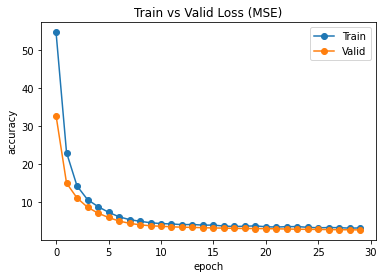

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss (MSE)')

plt.show()

### RMSE

In [ ]:
 # Run the training loop
train_losses=[]
val_losses=[]
eps=1e-6
def train(dataloader):
  model.train()
  total_loss = 0.0
    
  # Iterate over the DataLoader for training data
  for i, data in enumerate(dataloader, 0):
      
      # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
    optimizer.zero_grad()
      
      # Perform forward pass
    outputs = model(inputs)
      
      # Compute loss
    loss = torch.sqrt(loss_fn(outputs, targets) + eps)
      
      # Perform backward pass
    loss.backward()
      
      # Perform optimization
    optimizer.step()
      
      # Print statistics
    total_loss += loss.item()*inputs.size(0)
    
  train_losses.append(total_loss/len(dataloader.dataset))
  return(total_loss/len(dataloader.dataset))

def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
# Get and prepare inputs
          inputs, targets = data
          inputs, targets = inputs.float(), targets.float()
          targets = targets.reshape((targets.shape[0], 1))
# Perform forward pass
          outputs = model(inputs)
# Compute loss
          loss = torch.sqrt(loss_fn(outputs, targets) + eps)
          total_loss += loss.item()*inputs.size(0)
    val_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)

In [ ]:
model=MLP()
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 400

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dataloader)
    loss_eval = evaluate(valid_dataloader)
    
    if epoch % 10 == 0:
      print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 6.7307 loss valid: 4.7578
Epoch 10 loss train: 1.8740 loss valid: 1.7047
Epoch 20 loss train: 1.7767 loss valid: 1.6334
Epoch 30 loss train: 1.7128 loss valid: 1.5908
Epoch 40 loss train: 1.6485 loss valid: 1.5527
Epoch 50 loss train: 1.6465 loss valid: 1.5280
Epoch 60 loss train: 1.5558 loss valid: 1.5025
Epoch 70 loss train: 1.5028 loss valid: 1.4445
Epoch 80 loss train: 1.4645 loss valid: 1.4056
Epoch 90 loss train: 1.4449 loss valid: 1.3867
Epoch 100 loss train: 1.4253 loss valid: 1.3940
Epoch 110 loss train: 1.4160 loss valid: 1.3794
Epoch 120 loss train: 1.3721 loss valid: 1.3720
Epoch 130 loss train: 1.3998 loss valid: 1.3839
Epoch 140 loss train: 1.3660 loss valid: 1.3868
Epoch 150 loss train: 1.3407 loss valid: 1.3823
Epoch 160 loss train: 1.3320 loss valid: 1.3854
Epoch 170 loss train: 1.3238 loss valid: 1.3717
Epoch 180 loss train: 1.3068 loss valid: 1.3823
Epoch 190 loss train: 1.2883 loss valid: 1.3840
Epoch 200 loss train: 1.3058 loss valid: 1.3645
Epo

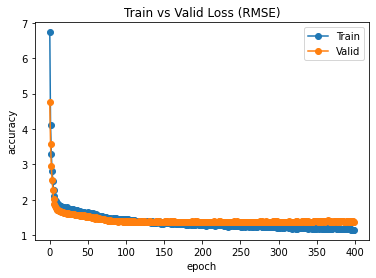

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss (RMSE)')

plt.show()

### R2

In [ ]:
y=[]
y_pred=[]
with torch.no_grad():
    model.eval()
    for i, data in enumerate(valid_dataloader, 0):

        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        outputs = model(inputs)
        y.append(targets.numpy())
        y_pred.append(outputs.numpy())
        

In [ ]:
y_pred = [a.squeeze().tolist() for a in y_pred]
y = [a.squeeze().tolist() for a in y]
y=sum(y,[])
y_pred=sum(y_pred,[])

In [ ]:
from sklearn.metrics import r2_score
r_square = r2_score(y, y_pred)
print(r_square)

0.7559565777314647


### GRADIO

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.9 MB 33.0 MB/s 
     |████████████████████████████████| 2.0 MB 60.0 MB/s 
     |████████████████████████████████| 212 kB 75.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 61.0 MB/s 
     |████████████████████████████████| 253 kB 77.8 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 271 kB 76.5 MB/s 
     |████████████████████████████████| 144 kB 70.8 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 10.9 MB 62.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 11.5 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 4.0 MB 61.1 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |██████████████████████

In [ ]:
import gradio as gr


def RNA_PRED(file):

  import torch
  import numpy as np
  from torch import nn
  from torch.utils.data import DataLoader
  from sklearn.preprocessing import StandardScaler

  X2_data=np.loadtxt(file.name, delimiter=',')


  class PrepareDataset(torch.utils.data.Dataset):

    def __init__(self, X, scale_data=True):
      if not torch.is_tensor(X):
      # Apply scaling if necessary
        if scale_data:
          X = StandardScaler().fit_transform(X)
        self.X = torch.from_numpy(X)
        

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i]

  dataset = PrepareDataset(X2_data)

  pred_dataloader = DataLoader(dataset, batch_size=10, shuffle=False, num_workers=1)


  def evaluate(dataloader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
          inputs = data
          inputs= inputs.float()
          outputs = model(inputs)
          predictions.append(outputs.numpy())
    return np.concatenate(predictions, axis=0)

  np.savetxt("user_predictions.csv",evaluate(pred_dataloader),fmt='%s',delimiter=",", comments="") 
  return "user_predictions.csv"

iface = gr.Interface(
    RNA_PRED,
    ["file"],
    "file",
    description="Introduce dataframe con de ADN de la región no codificante de S. cerevisiae")

iface.test_launch()

iface.launch()

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Test launch: RNA_PRED()... SKIPPED
Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://14222.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f7559f8b8d0>,
 'http://127.0.0.1:7860/',
 'https://14222.gradio.app')

In [ ]:
def RNA_PRED(file):

  import torch
  import numpy as np
  from torch import nn
  from torch.utils.data import DataLoader
  from sklearn.preprocessing import StandardScaler

  X2_data=np.loadtxt(file, delimiter=',')


  class PrepareDataset(torch.utils.data.Dataset):

    def __init__(self, X, scale_data=True):
      if not torch.is_tensor(X):
      # Apply scaling if necessary
        if scale_data:
          X = StandardScaler().fit_transform(X)
        self.X = torch.from_numpy(X)
        

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i]

  dataset = PrepareDataset(X2_data)

  pred_dataloader = DataLoader(dataset, batch_size=10, shuffle=False, num_workers=1)


  def evaluate(dataloader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
          inputs = data
          inputs= inputs.float()
          outputs = model(inputs)
          predictions.append(outputs.numpy())
    return np.concatenate(predictions, axis=0)

  
  return evaluate(pred_dataloader)

print(RNA_PRED("X2_data.csv"))

[[8.249711 ]
 [6.5403576]
 [7.4936876]
 ...
 [5.47408  ]
 [4.954178 ]
 [7.479663 ]]


## Modelo combinado

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

class TextData(Dataset):
    '''
    Dataset basico para leer las secuencias
    '''
    def __init__(self, text_file, tabular_file, scale_data=True):
      self.text_file = text_file
      self.df= pd.read_csv(text_file)
      if not torch.is_tensor(tabular_file):
        if scale_data:
          tabular_file = StandardScaler().fit_transform(tabular_file)
        self.tabular_file=tabular_file

    def __getitem__(self, index):
        tabular_file=self.tabular_file.tolist()
        return self.df.iloc[index,2], self.df.iloc[index,1], self.tabular_file[index]

    def __len__(self):
        return len(self.df)   
    

In [ ]:
X2_data=np.loadtxt('X2_data.csv', delimiter=',')

In [ ]:
ds = TextData("text_data_norm.csv",X2_data)

In [ ]:
print(ds[2])

(-0.1489275507571887, 'ATACCAATTACTGTCCGTAGTTCGTCAGATTAGAATCCACTATATTTTCTTTGATTGGGAGTTAACGCTGCATACTTGTCTTGGGTACTGCGTTAACCATAAATCACATAAGCGTCATTCATTATCGTACCTCTGGGTAAGTGTTTTTCAGGAGTTTTTATATATAATATGCTGGCCCCCAAGGCGGATGAGGACTGTATACGGTTTTGACGTTAAAGTGTTATATGAATCGCAGTCGCATACACTAGTGGACCCCTAGTTCCGCGATACGTAGTTGACCCTCAGTACAGAGATTCCCACGATTAACGGGTGTACTGCTCCTGACTAATGTAATTTTGAGTTCACCTGTTGATGTGGTGCTGATACTGGCACCAGTACTAATGTTTGGAAGAACTCCGTAGCATTAAGTGGAGAGATTAATCCGATACTGAGCTGAATAGTTGGTTTCACTCCCGCAAAAAGATATCAATACAGTTTGCTAACAACTTGGGAAACCCTGATGAGAAGAATTAGCGGTCATCCTGAGAAATAGGTGACCATTTAAATGGTCACTTGAATTCGATTTTCCAGTAAGGGAAGTGTCATTCGGAATCCAGAATATACCAGAAATAAGCAATTTTGCATGATAGTGCTGTTATCCTTTCTTGTGTTTTATACGATATCATACATCACCCCATTACGTTATTTATCTTGCATTTCAGTTTTTACTGGGTTTACCCTTTTCGCGATTTATATCATATTATCACCGCACATAATATACTAGTAACATTACTATTCGTCGACAAACAATAGCTTGTTTTGATTCCAGTTCTCATAACATTTGTGTACCTATTCTTTTGCCGTTCCTTCGCTATTTGGTATTGTCATCTAAGTTCGTCTATTAAATTTCCTTTTTAGGAAAAGCGCCTAATAGGCCTTTCTTGAAGCTTTTTTTTTTTCTTTCTTTAATCTACAATAATAACAAAATATTTCATTCT

In [ ]:
def collate_batch(batch):
    label_list, text_list, lengths, tabular_list = [], [], [], []
    for _label, _text, _tabular in batch:
        label_list.append(_label)
        tabular_list.append(_tabular)
        processed_text = torch.tensor(text_pipeline(_text))
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    tabular_list = torch.tensor(tabular_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True)
    return padded_text_list.to(device), label_list.to(device), lengths.to(device), tabular_list.to(device)

In [ ]:
tr_per = 0.85
train_dataset, valid_dataset = random_split(ds,
 [int(len(ds)*tr_per),len(ds) - int(len(ds)*tr_per)], torch.manual_seed(42))

In [ ]:
## Toma un pequeño batch

from torch.utils.data import DataLoader
dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False, collate_fn=collate_batch)
text_batch, label_batch, length_batch,tabular_batch = next(iter(dataloader))
print(text_batch)
print(label_batch)
print(length_batch)
print(text_batch.shape)
print(tabular_batch)

tensor([[   4, 2328,   39, 1796,   77, 2250, 1068,  264, 1000, 3174, 1901,   41,
         3583, 1283, 1342,  404,  323, 1880, 2416, 1048, 1256,  585, 3039, 1902,
         1840,  204, 3648, 2329,  274, 3419, 1705, 1026, 1085, 1609,  281, 1663,
          951, 1343,   20, 1540,  257, 1386, 1685, 1514,   69,  356, 2523,  299,
         1049,  508,  258, 3040,  340,  288,   20, 2976, 2958, 2776, 2129, 1104,
         2534, 1155,  750, 1073,  842, 1295, 1441, 3394,   70, 1063,   54, 2129,
         1979, 3249, 3073, 2297,  329,  306,  693,    6, 2257, 3686,  943,  103,
         2049, 3564, 2601,    2,  491, 1760,  944, 1257,  960,  485,  920,  819,
         1050,  442,  681,   96, 2189,    9, 3106, 3226, 1686,  682,  350, 2221,
          280, 2925,   25, 1020,  468, 2406,  565,  379,   86,  334,   30, 2926,
         1570, 2583, 3298, 2883, 1515, 1199, 1503, 3074, 3565, 2667, 1318,  707,
          123, 1821, 1220,  266, 2077, 1583, 1319, 2711,  512, 2641,  358,  123,
          359,  245,  895,  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
## Paso 4: batching los datasets

batch_size = 64

train_dl = DataLoader(train_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(valid_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)

### Modelo

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,num_layers=2,
                           batch_first=True,bidirectional = True, dropout=0.7 )
        self.fc1 = nn.Linear(rnn_hidden_size*2, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        
     
        
        self.layers = nn.Sequential(
          nn.Linear(72, 64),
          nn.Dropout(p=0.1),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.Dropout(p=0.1),
          nn.ReLU(),
          nn.Linear(32, 1),
        )

        self.fc3 = nn.Linear(2, 1) 


    def forward(self, text, lengths, tab):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        # out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)        
        
        tab=self.layers(tab.float())
        x = torch.cat((out, tab), dim=1)
        x = self.relu(x)
        return self.fc3(x)

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 32
fc_hidden_size = 16

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

### Entrenamiento

#### MSE

In [ ]:
train_losses=[]
val_losses=[]

def train(dataloader):
    model.train()
    total_loss = 0
    for text_batch, label_batch, lengths, tabular in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths, tabular.float())
        label_batch = label_batch.unsqueeze(1)
        loss = loss_fn(pred.float(), label_batch.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*label_batch.size(0)
        
    train_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for text_batch, label_batch, lengths, tabular in dataloader:
            pred = model(text_batch, lengths,tabular.float())
            label_batch = label_batch.unsqueeze(1)
            loss = loss_fn(pred.float(), label_batch.float())
            total_loss += loss.item()*label_batch.size(0)
            
    val_losses.append(total_loss/len(dataloader.dataset))       
    return total_loss/len(dataloader.dataset)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 1.0124 loss valid: 0.9291
Epoch 1 loss train: 1.0109 loss valid: 0.9300
Epoch 2 loss train: 0.9972 loss valid: 0.8922
Epoch 3 loss train: 0.6577 loss valid: 0.5006
Epoch 4 loss train: 0.4644 loss valid: 0.4521
Epoch 5 loss train: 0.3798 loss valid: 0.4120
Epoch 6 loss train: 0.3353 loss valid: 0.4074
Epoch 7 loss train: 0.2955 loss valid: 0.4088
Epoch 8 loss train: 0.2539 loss valid: 0.4230
Epoch 9 loss train: 0.2081 loss valid: 0.4348
Epoch 10 loss train: 0.1729 loss valid: 0.4754
Epoch 11 loss train: 0.1491 loss valid: 0.4532
Epoch 12 loss train: 0.1172 loss valid: 0.4580
Epoch 13 loss train: 0.1157 loss valid: 0.4640
Epoch 14 loss train: 0.1036 loss valid: 0.4895
Epoch 15 loss train: 0.0969 loss valid: 0.4988
Epoch 16 loss train: 0.0850 loss valid: 0.5244
Epoch 17 loss train: 0.0787 loss valid: 0.5138
Epoch 18 loss train: 0.0746 loss valid: 0.5287
Epoch 19 loss train: 0.0703 loss valid: 0.5181
Epoch 20 loss train: 0.0674 loss valid: 0.5268
Epoch 21 loss train: 0.

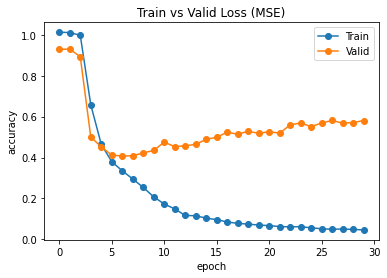

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss (MSE)')

plt.show()

#### RMSE

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 32
fc_hidden_size = 16

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

In [ ]:
train_losses=[]
val_losses=[]
eps=1e-6

def train(dataloader):
    model.train()
    total_loss = 0
    for text_batch, label_batch, lengths, tabular in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths, tabular.float())
        label_batch = label_batch.unsqueeze(1)
        loss = torch.sqrt(loss_fn(pred.float(), label_batch.float())+eps)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*label_batch.size(0)
        
    train_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for text_batch, label_batch, lengths, tabular in dataloader:
            pred = model(text_batch, lengths,tabular.float())
            label_batch = label_batch.unsqueeze(1)
            loss = torch.sqrt(loss_fn(pred.float(), label_batch.float())+eps)
            total_loss += loss.item()*label_batch.size(0)
            
    val_losses.append(total_loss/len(dataloader.dataset))       
    return total_loss/len(dataloader.dataset)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 0.9792 loss valid: 0.8775
Epoch 1 loss train: 0.8000 loss valid: 0.6861
Epoch 2 loss train: 0.6900 loss valid: 0.6212
Epoch 3 loss train: 0.6444 loss valid: 0.5828
Epoch 4 loss train: 0.6125 loss valid: 0.5576
Epoch 5 loss train: 0.5688 loss valid: 0.5689
Epoch 6 loss train: 0.5580 loss valid: 0.5507
Epoch 7 loss train: 0.5333 loss valid: 0.5624
Epoch 8 loss train: 0.5106 loss valid: 0.5584
Epoch 9 loss train: 0.4757 loss valid: 0.5669
Epoch 10 loss train: 0.4610 loss valid: 0.5646
Epoch 11 loss train: 0.4337 loss valid: 0.5765
Epoch 12 loss train: 0.3995 loss valid: 0.5992
Epoch 13 loss train: 0.3809 loss valid: 0.5827
Epoch 14 loss train: 0.3623 loss valid: 0.6006
Epoch 15 loss train: 0.3571 loss valid: 0.6151
Epoch 16 loss train: 0.3215 loss valid: 0.6163
Epoch 17 loss train: 0.3008 loss valid: 0.6077
Epoch 18 loss train: 0.2962 loss valid: 0.6172
Epoch 19 loss train: 0.2809 loss valid: 0.6232
Epoch 20 loss train: 0.2738 loss valid: 0.6234
Epoch 21 loss train: 0.

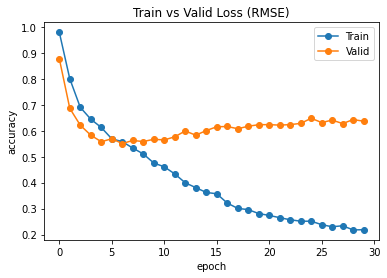

In [ ]:
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss (RMSE)')

plt.show()

#### R2

In [ ]:
y=[]
y_pred=[]
with torch.no_grad():
    model.eval()
    for text_batch, label_batch, lengths, tabular in dataloader:

        outputs = model(text_batch, lengths,tabular.float())
        label_batch = label_batch.unsqueeze(1)
        y.append(label_batch.cpu().numpy())
        y_pred.append(outputs.cpu().numpy())

In [ ]:
y_pred = [a.squeeze().tolist() for a in y_pred]
y = [a.squeeze().tolist() for a in y]


In [ ]:
r_square = r2_score(y, y_pred)
print(r_square)

0.987972670119807
